In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 
import statistics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing and reading data in data frame

In [2]:
#read the data in pandas data frame 
df = pd.read_csv("Leads.csv")

In [3]:
# check data in loaded in the data frame
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting data 

In [4]:
# check the shape of the data frame
df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- int , float and object are the data types of the available data
- there are some columns with null values 
- there are some identifier columns like "Prospect ID" , "Lead Number" 
- there are some categorical columns like "Lead Origin" ,  "Lead Source" , Converted etc for which the data type is not categorical but object
- numerical columns are TotalVisits , Total Time Spent , Page Views Per Visit  on Website


In [7]:
# analysing if column Lead Number has unique values 
len(df.groupby(["Lead Number"])["Lead Number"].count())
# looks like all Lead number are unique values just like any other identifier

9240

In [8]:
# Looks like there are null values for some columns 
# lets calculate percentage null count columnwise

percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing >0]


Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

- Asymmetrique Profile Score, Asymmetrique Activity Score,Asymmetrique Profile Index, Asymmetrique Activity Index, Lead Quality, Tags has more than 30% of null value
- Country and City gives the similar information of location of lead.  

In [9]:
#Lets inspect the categorical columns one by one and see if it needs any data cleaning 
list_of_cat_columns = ["Lead Origin", "Lead Source" , "Do Not Email" , "Do Not Call" , "Converted" , "Last Activity" , "Country" , "Specialization" , "How did you hear about X Education" , 
                       "What is your current occupation" , "What matters most to you in choosing a course","Search" , "Magazine" , "Newspaper Article" , "X Education Forums" , "Newspaper"
                       ,"Digital Advertisement" , "Through Recommendations" , "Receive More Updates About Our Courses", "Tags" , "Lead Quality",
                      "Update me on Supply Chain Content" , "Get updates on DM Content" , "Lead Profile" , "City" , "Asymmetrique Activity Index" ,
                      "Asymmetrique Profile Index" , "I agree to pay the amount through cheque" , "A free copy of Mastering The Interview","Last Notable Activity"]

In [10]:
len(list_of_cat_columns)

30

In [11]:
for col in list_of_cat_columns:
    print("***********************")
    print(col)
    print("***********************")
    print(df[col].value_counts())
    

***********************
Lead Origin
***********************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
***********************
Lead Source
***********************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64
***********************
Do Not Email
***********************
No     8506
Yes     734
Name: Do Not Email, dtype

- Prospect Id and Lead Number are unique identifier 
- Column country has 5 records with "unknown" value 
- Column Specialization , has 1942 records where customers have not selected any value and has the value 
  as Select. Its different from having null value, but functionally it can be same.
- "How did you hear about X Education" has 5043 records with *select*   val
- "Update me on Suppy Chain" has all records with value No 
- "Get updates on DM content" has all records with value No
- "Lead Profile" has value as Select for 4146 records
- City has value as Select for 2249 records.
- Lead Source has value like "Google" and "google". We would need to convert google to Google


### Actions 
- drop unique identifier columns i.e.Prospect Id  
- drop columns which has more than 30% missing values i.e drop Asymmetrique Profile Score, Asymmetrique Activity Score,Asymmetrique Profile Index, Asymmetrique Activity Index, Lead Quality, Tags
- drop Country columns 

In [12]:
drop_columns = ["Prospect ID"  ,"Lead Quality", "Asymmetrique Profile Score","Asymmetrique Activity Score",
               "Asymmetrique Profile Index" , "Asymmetrique Activity Index"  , "Country" , "Get updates on DM Content" , "Update me on Suppy Chain"]
for col in drop_columns:
    if col in df.columns:
        df.drop(col , axis =1 , inplace=True)

In [13]:
# recalculating percentage of null values after dropping columns mentioned in list drop_columns
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing >0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

# Imputing missing values

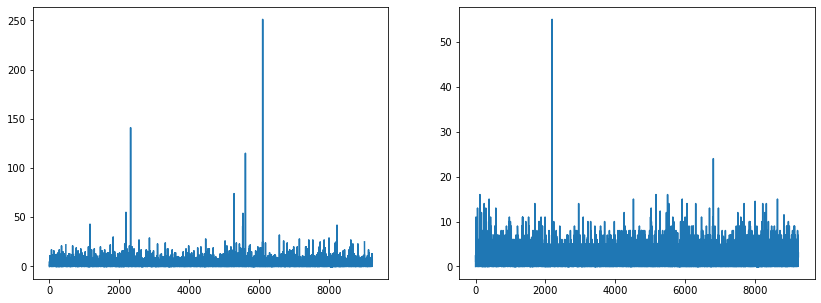

In [14]:
#lets plot the numerical columns with null value 
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(df["TotalVisits"])
plt.subplot(122)
plt.plot(df["Page Views Per Visit"])


In [15]:
#impute the numerical columns with median
num_cols = ["TotalVisits" , "Page Views Per Visit"]
for col in num_cols:
    m = df[col].median()
    df[col]=df[col].fillna(m)

In [16]:
# updating the list of categorical columns 
for col in list_of_cat_columns:
    if col not in df.columns:
        list_of_cat_columns.remove(col)
print(len(list_of_cat_columns))

26


<AxesSubplot:title={'center':'After Imputing with Most Frequent Value'}, xlabel='Tags', ylabel='count'>

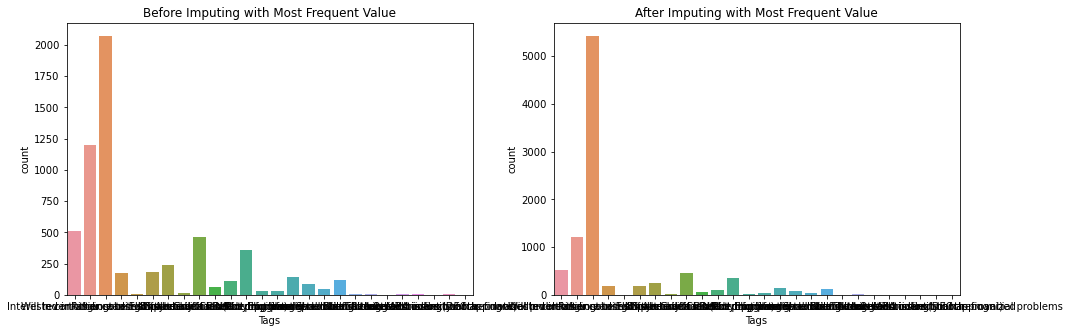

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'Tags')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = df.fillna(value = df['Tags'].mode()[0]), x = 'Tags')

- After imputing Tags with most common value, skewness will increase a lot. So we will not impute for now. 

In [18]:
list_of_lastactivity = df[df['Last Activity'].isnull()]['Tags'].value_counts()

- Imputing Last Activity.So based on tags we will going to impute the 'Last Activity' by using the most frequent item.We will calculate the value counts of tags,where Last Activity is null. Then will calculate the most common value of Last Activity where Tags in Known and will use this calculated value to impute Last Activity.


In [19]:
list_of_lastactivity

Closed by Horizzon                     47
Will revert after reading the email    26
Ringing                                12
Interested in other courses             4
Lost to EINS                            2
Busy                                    1
number not provided                     1
Interested  in full time MBA            1
Name: Tags, dtype: int64

In [20]:
for lastActivity in range(len(list_of_lastactivity)):
    #print(list_of_lastactivity.index[lastActivity] , list_of_lastactivity.values[lastActivity])
    lAc = list_of_lastactivity.index[lastActivity]
    m = df[df["Tags"] == lAc]["Last Activity"].mode()[0]
    df.loc[(df['Last Activity'].isnull()) & (df['Tags'] == lAc), 'Last Activity'] = m

    

In [21]:
# still there are some Null values in Last Activity, these values are one for which both Tags and last Activity 
# are null . I will imput ot with the mode of Last Activity now.
df['Last Activity'].fillna(df['Last Activity'].mode()[0] , inplace=True)

<AxesSubplot:title={'center':'After Imputing with Most Frequent Value'}, xlabel='Lead Source', ylabel='count'>

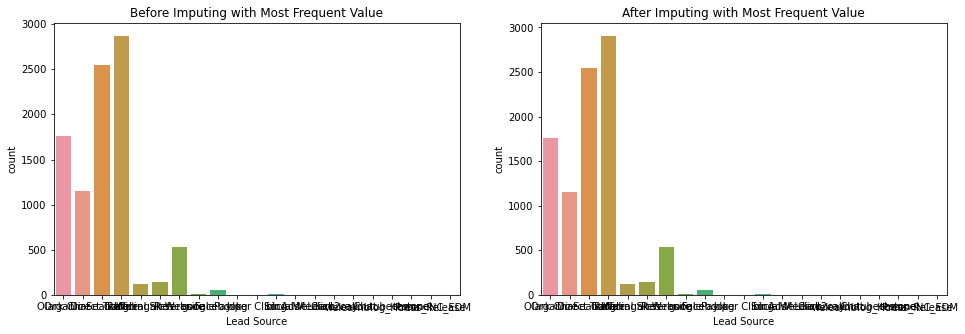

In [22]:
# Comparing Before and after imputing with mode of Lead Source Column

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'Lead Source')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = df.fillna(value = df['Lead Source'].mode()[0]), x = 'Lead Source')

In [23]:
#Imputing Lead Score with mode 
df['Lead Source'].fillna(value = df['Lead Source'].mode()[0] , inplace = True)

In [24]:
## impute null and "Select" with unknown value for Specializatin
df['Specialization'][df['Specialization'].isnull() | (df['Specialization'] =="Select")  ] = "Unknown"

In [25]:
#Impute City with most comon values #
df['City'][df['City'].isnull() | (df['City'] =="Select")  ] = df['City'].mode()[0]

In [26]:

len(df['How did you hear about X Education'][df['How did you hear about X Education'].isnull() | (df['How did you hear about X Education'] =="Select")  ])

7250

In [27]:
#7250 values are either null or user didnot provide any value  for column "How did you hear about X Education'][df['How did you hear about X Education"
#Dropping the column
df = df.drop('How did you hear about X Education' , axis =1 )

In [28]:
#What is your current occupation

len(df['What is your current occupation'][df['What is your current occupation'].isnull() | (df['What is your current occupation'] =="Select")  ])

2690

<AxesSubplot:title={'center':'After Imputing with Most Frequent Value'}, xlabel='What is your current occupation', ylabel='count'>

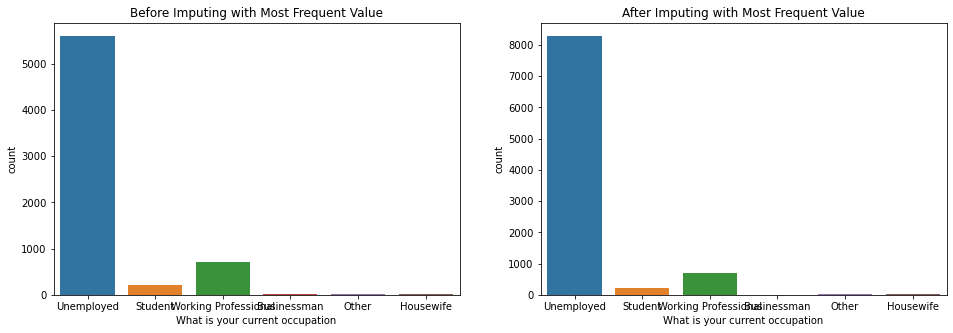

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'What is your current occupation')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = df.fillna(value = df['What is your current occupation'].mode()[0]), x = 'What is your current occupation')

In [30]:
# in this case missing data is more than 3% so imputing with mode might introduce lot of skewness. 
# I am imputing missing data i.e. data is either null or data = "Select" with "Unknown"
df['What is your current occupation'][df['What is your current occupation'].isnull() | (df['What is your current occupation'] =="Select")  ] = "Unknown"

In [31]:
#What matters most to you in choosing a course


len(df['What matters most to you in choosing a course'][df['What matters most to you in choosing a course'].isnull() | (df['What matters most to you in choosing a course'] =="Select")  ])

2709

In [32]:
df['What matters most to you in choosing a course'][df['What matters most to you in choosing a course'].isnull() | (df['What matters most to you in choosing a course'] =="Select")  ] = "Unknown"

In [33]:
#Lead Profile


len(df['Lead Profile'][df['Lead Profile'].isnull() | (df['Lead Profile'] =="Select")  ])
#74% of data is missng or users have not selected any value . Dropping this column 
df = df.drop('Lead Profile' , axis =1 )

In [34]:
# Tags 
len(df['Tags'][df['Tags'].isnull() | (df['Tags'] =="Select")  ])

# Dropping colum
df = df.drop('Tags' , axis =1 )

# Treating Outliers 

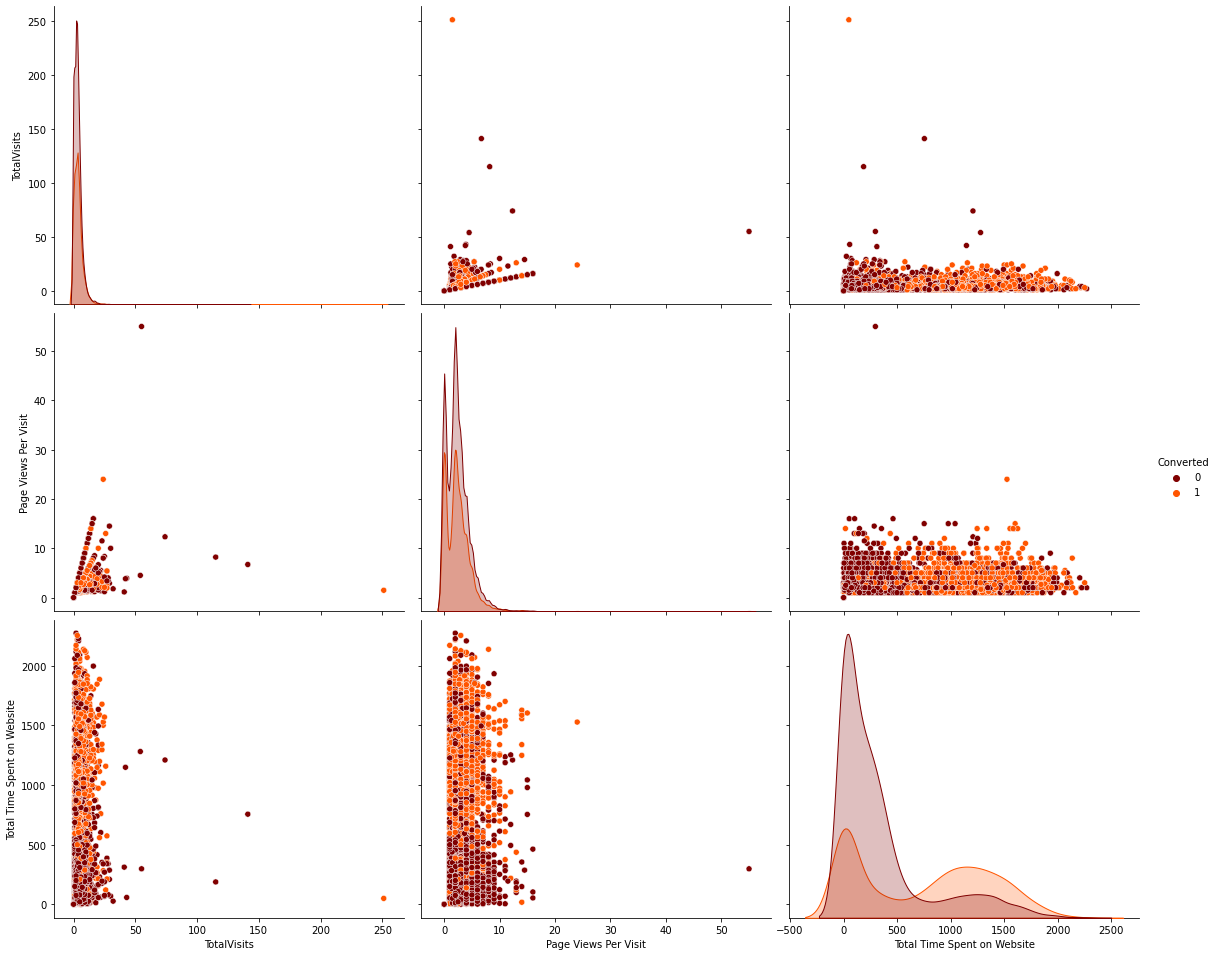

In [35]:
sns.pairplot(df[["TotalVisits" , "Page Views Per Visit" , "Total Time Spent on Website" , "Converted"]], hue = 'Converted', palette = 'gist_heat', height = 4.5, aspect = 1.2)


In [36]:
num_cols.append("Total Time Spent on Website")

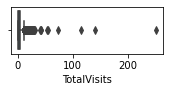

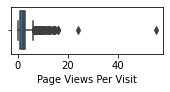

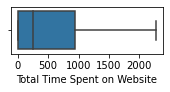

In [37]:


for i in enumerate(num_cols):
    
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x = i[1] , data = df)
    plt.show()

In [38]:
for i , feature in enumerate(num_cols):
    desc = df[feature].describe()
    q1 = desc["25%"]
    q2 = desc["50%"]
    q3 = desc["75%"]
    iqr = q3 -q1 
    upper_boud = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr 
    df[feature] = np.where(df[feature] > upper_boud , upper_boud , df[feature])
    df[feature] = np.where( df[feature]  < lower_bound , lower_bound ,df[feature] )

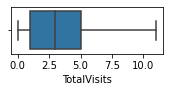

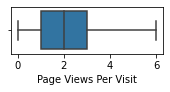

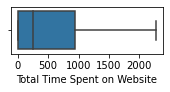

In [39]:
for i in enumerate(num_cols):
    
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x = i[1] , data = df)
    plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   float64
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

# Data Preparation

In [41]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article' , 
           'X Education Forums' , 'Newspaper','Digital Advertisement','Through Recommendations'
           ,'Receive More Updates About Our Courses','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview' , 'Update me on Supply Chain Content' ]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [42]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,...,0,0,0,0,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,...,0,0,0,0,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,...,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,...,0,0,0,0,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,...,0,0,0,0,0,0,Mumbai,0,0,Modified


In [43]:
#Google and google are same in df["Lead Source"].Converting google to Google
df["Lead Source"][df["Lead Source"] == "google"] = "Google"

In [44]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
cat_cols = ['Lead Origin' , 'Lead Source' , 'Specialization' , "Last Activity",
    'What matters most to you in choosing a course','Last Notable Activity' ,'City',
            'What is your current occupation' ]
for col in cat_cols:
    dummy1 = pd.get_dummies(df[col], drop_first=True ,  prefix=col)
    df = pd.concat([df, dummy1], axis=1)
    df = df.drop(col , axis =1)
  
 


In [45]:
df

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,660737,0,0,0,0.0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,660728,0,0,0,5.0,674.0,2.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,0,0,1,2.0,1532.0,2.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,660719,0,0,0,1.0,305.0,1.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,0,0,1,2.0,1428.0,1.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845.0,2.67,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,579546,0,0,0,2.0,238.0,2.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9237,579545,1,0,0,2.0,199.0,2.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9238,579538,0,0,1,3.0,499.0,3.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [46]:
df.to_csv("prepared_dataset.csv")

# Test-Train Split

In [47]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2.0,1532.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [50]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
1871,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0,0,0.275215,0.005716,-0.516439,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0,0.624595,-0.691418,0.143543,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0,0,0.624595,1.365219,1.553761,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
### Checking the Conversion Rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
round(conversion_rate,2)

38.54

# Model Building 


In [52]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6374
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Oct 2023   Deviance:                          nan
Time:                        11:58:56   Pearson chi2:                 7.70e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.112e+13   5.27e+07  -2.11e+05      0.000   -1.11e+13   -1.11e+13
Do Not Email                                                            -7.495e+14   4.44e+06  -1.69e+08      0.000   -7.49e+14   -7.49e+14
Do Not Call                                                              8.429e+14   4.77e+07   1.77e+07      0.000    8.43e+14    8.43e+14
TotalVisits                                                              2.344e+14   1.38e+06    1.7e+08      0.000    2.34e+14    2.34e+14
Total Time Spent on Website                                              6.874e+14   9.59e+05   7.17e+08      0.000    6.87e+14    6.87e+14
Page Views Per Visit                                                    -2.687e+14   1.53e+06  -1.76e+08      0.000   -2.69e+14   -2.69e+14
Search                                                                   -1.67e+15   2.21e+07  -7.55e+07      0.000   -1.67e+15   -1.67e+15
Magazine                                                                   56.2621   5.26e-07   1.07e+08      0.000      56.262      56.262
Newspaper Article                                                        5.129e+15   6.73e+07   7.62e+07      0.000    5.13e+15    5.13e+15
X Education Forums                                                       -3.83e+15   1.11e+08  -3.44e+07      0.000   -3.83e+15   -3.83e+15
Newspaper                                                               -1.114e+16   6.73e+07  -1.66e+08      0.000   -1.11e+16   -1.11e+16
Digital Advertisement                                                   -5.078e+15   4.77e+07  -1.07e+08      0.000   -5.08e+15   -5.08e+15
Through Recommendations                                                  2.558e+14   2.86e+07   8.94e+06      0.000    2.56e+14    2.56e+14
Receive More Updates About Our Courses                                    -39.4739    5.7e-07  -6.93e+07      0.000     -39.474     -39.474
Update me on Supply Chain Content                                         -87.0301    1.1e-06   -7.9e+07      0.000     -87.030     -87.030
I agree to pay the amount through cheque                                  -76.5706   6.06e-07  -1.26e+08      0.000     -76.571     -76.571
A free copy of Mastering The Interview                                  -2.171e+14    2.7e+06  -8.04e+07      0.000   -2.17e+14   -2.17e+14
Lead Origin_Landing Page Submission                                     -4.027e+14   3.43e+06  -1.18e+08      0.000   -4.03e+14   -4.03e+14
Lead Origin_Lead Add Form                                                1.443e+15    1.3e+07   1.11e+08      0.000    1.44e+15    1.44e+15
Lea

##  Feature Selection Using RFE

In [53]:

logreg = LogisticRegression()

In [54]:

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 24),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Search', False, 60),
 ('Magazine', False, 84),
 ('Newspaper Article', False, 9),
 ('X Education Forums', False, 50),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 15),
 ('Through Recommendations', False, 39),
 ('Receive More Updates About Our Courses', False, 88),
 ('Update me on Supply Chain Content', False, 83),
 ('I agree to pay the amount through cheque', False, 85),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Lead Source_Direct Traffic', False, 28),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Ol

In [57]:
col = X_train.columns[rfe.support_]

In [58]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administrat

### Assessing the model with StatsModels

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.8
Date:                Mon, 09 Oct 2023   Deviance:                       5179.5
Time:                        11:59:03   Pearson chi2:                 7.61e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.0678      0.128     -0.529      0.597      -0.319       0.183
Do Not Email                                             -1.1643      0.169     -6.894      0.000      -1.495      -0.833
Total Time Spent on Website                               1.0745      0.040     26.739      0.000       0.996       1.153
Lead Origin_Landing Page Submission                      -1.0183      0.130     -7.858      0.000      -1.272      -0.764
Lead Origin_Lead Add Form                                 2.9296      0.204     14.366      0.000       2.530       3.329
Lead Source_Olark Chat                                    0.9844      0.122      8.100      0.000       0.746       1.223
Lead Source_Welingak Website                              2.3927      0.745      3.212      0.001       0.933       3.853
Specialization_Unknown                                   -0.9584      0.124     -7.704      0.000      -1.202      -0.715
Last Activity_Had a Phone Conversation                    1.2337      0.969      1.273      0.203      -0.665       3.132
Last Activity_SMS Sent                                    1.2924      0.075     17.273      0.000       1.146       1.439
What matters most to you in choosing a course_Unknown    -1.0355      0.088    -11.749      0.000      -1.208      -0.863
Last Notable Activity_Had a Phone Conversation            2.0919      1.483      1.411      0.158      -0.815       4.998
Last Notable Activity_Modified                           -0.9021      0.080    -11.252      0.000      -1.059      -0.745
Last Notable Activity_Unreachable                         1.7268      0.546      3.160      0.002       0.656       2.798
What is your current occupation_Housewife                22.9430   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Working Professional      2.4399      0.194     12.602      0.000       2.060       2.819
=========================================================================================================================
"""

In [60]:
#### Dropping What is your current occupation_Housewife as the p_value is quite high i.e.0.999

In [61]:
col= col.drop("What is your current occupation_Housewife" )

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Mon, 09 Oct 2023   Deviance:                       5194.1
Time:                        11:59:04   Pearson chi2:                 7.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.0621      0.128     -0.485      0.628      -0.313       0.189
Do Not Email                                             -1.1709      0.169     -6.935      0.000      -1.502      -0.840
Total Time Spent on Website                               1.0732      0.040     26.744      0.000       0.995       1.152
Lead Origin_Landing Page Submission                      -1.0128      0.129     -7.823      0.000      -1.267      -0.759
Lead Origin_Lead Add Form                                 2.9455      0.204     14.464      0.000       2.546       3.345
Lead Source_Olark Chat                                    0.9833      0.121      8.096      0.000       0.745       1.221
Lead Source_Welingak Website                              2.3759      0.745      3.190      0.001       0.916       3.836
Specialization_Unknown                                   -0.9622      0.124     -7.741      0.000      -1.206      -0.719
Last Activity_Had a Phone Conversation                    1.2231      0.969      1.262      0.207      -0.676       3.122
Last Activity_SMS Sent                                    1.2846      0.075     17.186      0.000       1.138       1.431
What matters most to you in choosing a course_Unknown    -1.0402      0.088    -11.812      0.000      -1.213      -0.868
Last Notable Activity_Had a Phone Conversation            2.0928      1.483      1.411      0.158      -0.814       5.000
Last Notable Activity_Modified                           -0.8968      0.080    -11.211      0.000      -1.054      -0.740
Last Notable Activity_Unreachable                         1.7203      0.547      3.148      0.002       0.649       2.792
What is your current occupation_Working Professional      2.4302      0.194     12.559      0.000       2.051       2.809
=========================================================================================================================
"""

In [63]:
#### Dropping Last Activity_Had a Phone Conversation as the p_value is quite high than ..05 i.e.0.207	

In [64]:
col= col.drop("Last Notable Activity_Had a Phone Conversation" )

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.1
Date:                Mon, 09 Oct 2023   Deviance:                       5196.2
Time:                        11:59:04   Pearson chi2:                 8.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.0580      0.128     -0.453      0.650      -0.309       0.193
Do Not Email                                             -1.1730      0.169     -6.951      0.000      -1.504      -0.842
Total Time Spent on Website                               1.0716      0.040     26.725      0.000       0.993       1.150
Lead Origin_Landing Page Submission                      -1.0135      0.129     -7.834      0.000      -1.267      -0.760
Lead Origin_Lead Add Form                                 2.9430      0.204     14.450      0.000       2.544       3.342
Lead Source_Olark Chat                                    0.9827      0.121      8.090      0.000       0.745       1.221
Lead Source_Welingak Website                              2.3792      0.745      3.194      0.001       0.919       3.839
Specialization_Unknown                                   -0.9654      0.124     -7.769      0.000      -1.209      -0.722
Last Activity_Had a Phone Conversation                    2.3048      0.683      3.376      0.001       0.967       3.643
Last Activity_SMS Sent                                    1.2835      0.075     17.176      0.000       1.137       1.430
What matters most to you in choosing a course_Unknown    -1.0395      0.088    -11.806      0.000      -1.212      -0.867
Last Notable Activity_Modified                           -0.9029      0.080    -11.300      0.000      -1.060      -0.746
Last Notable Activity_Unreachable                         1.7168      0.546      3.141      0.002       0.646       2.788
What is your current occupation_Working Professional      2.4266      0.194     12.537      0.000       2.047       2.806
=========================================================================================================================
"""

In [66]:
#### Checking VIFs

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Unknown,2.30
4,Lead Source_Olark Chat,1.89
2,Lead Origin_Landing Page Submission,1.83
10,Last Notable Activity_Modified,1.67
9,What matters most to you in choosing a course_...,1.64
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.51
5,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.24
12,What is your current occupation_Working Profes...,1.19


In [ ]:
## No VIF treatment is needed

# Evaluating the Model

In [68]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.493981
6795    0.116014
3516    0.313974
8105    0.842236
3934    0.130975
4844    0.990386
3297    0.135454
8071    0.998396
987     0.089764
7423    0.914980
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49398077, 0.11601355, 0.31397408, 0.84223602, 0.13097496,
       0.99038618, 0.13545386, 0.99839553, 0.08976422, 0.91497989])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.493981,1871
1,0,0.116014,6795
2,0,0.313974,3516
3,0,0.842236,8105
4,0,0.130975,3934


In [71]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.493981,1871,0
1,0,0.116014,6795,0
2,0,0.313974,3516,0
3,0,0.842236,8105,1
4,0,0.130975,3934,0


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3554  448]
 [ 738 1728]]


In [74]:
# Predicted     not_converted    converted
# Actual
# not_converted        3554      448
# converted            738       1728  

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8166357452071737


In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7007299270072993

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.888055972013993

In [79]:
# Calculate false postive rate - predicting lead got converted  when actually they were not 
print(FP/ float(TN+FP))

0.111944027986007


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.7941176470588235


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8280521901211556


In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

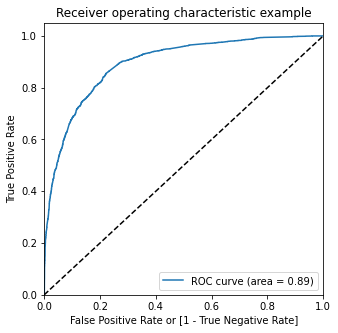

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.493981,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.116014,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.313974,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.842236,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.130975,3934,0,1,1,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.618738  0.972019  0.401049
0.2   0.2  0.769481  0.915247  0.679660
0.3   0.3  0.807050  0.847932  0.781859
0.4   0.4  0.813544  0.772506  0.838831
0.5   0.5  0.816636  0.700730  0.888056
0.6   0.6  0.806122  0.612733  0.925287
0.7   0.7  0.791126  0.541363  0.945027
0.8   0.8  0.764688  0.431062  0.970265
0.9   0.9  0.722171  0.293187  0.986507


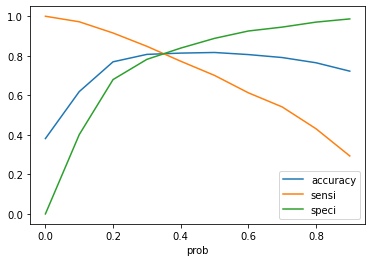

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.493981,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.116014,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.313974,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.842236,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.130975,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8070500927643784

In [91]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3129,  873],
       [ 375, 2091]])

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8479318734793188

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.7818590704647677

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2181409295352324


In [96]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7054655870445344


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8929794520547946


In [98]:
### Precision and recall tradeoff

In [99]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

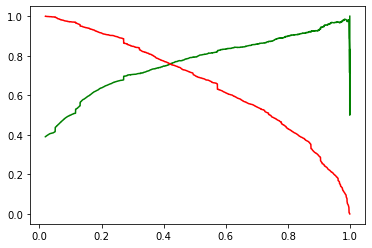

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set


In [102]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [103]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Unknown,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What matters most to you in choosing a course_Unknown,Last Notable Activity_Modified,Last Notable Activity_Unreachable,What is your current occupation_Working Professional
4269,0,0.964504,0,0,0,0,1,0,1,1,0,0,0
2376,0,-0.885371,0,1,0,0,1,0,1,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,1,1
9199,0,-0.885371,0,0,1,0,1,0,0,0,1,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0


In [104]:
X_test_sm = sm.add_constant(X_test)

In [105]:
# Making predictions on the test set

In [106]:
y_test_pred = res.predict(X_test_sm)

In [107]:
y_test_pred[:10]

4269    0.563221
2376    0.905037
7766    0.962758
9199    0.130975
4359    0.873946
9186    0.613785
1631    0.491489
8963    0.190522
8007    0.035980
5324    0.395803
dtype: float64

In [108]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [109]:
# Let's see the head
y_pred_1.head()

,0
4269,0.563221
2376,0.905037
7766,0.962758
9199,0.130975
4359,0.873946


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [112]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.563221
1,1,2376,0.905037
2,1,7766,0.962758
3,0,9199,0.130975
4,1,4359,0.873946


In [115]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [116]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.563221
1,2376,1,0.905037
2,7766,1,0.962758
3,9199,0,0.130975
4,4359,1,0.873946


In [125]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [126]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.563221,1
1,2376,1,0.905037,1
2,7766,1,0.962758,1
3,9199,0,0.130975,0
4,4359,1,0.873946,1


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8084415584415584

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1313,  364],
       [ 167,  928]])

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7698630136986301

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8616577221228384